<a href="https://colab.research.google.com/github/slmsshk/Data_Science-_Dummy/blob/main/Naive_Bayes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes

In [1]:
import pandas as pd
data = pd.read_csv('data/train.csv')

In [2]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Aproach 1

In [3]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)


In [4]:
data['text'] = data.text.apply(clean)
data.text

0       our deeds are the reason of this earthquake ma...
1                   forest fire near la ronge sask canada
2       all residents asked to shelter in place are be...
3        people receive wildfires evacuation orders in...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    ariaahrary thetawniest the out of control wild...
7610                                 s of volcano hawaii 
7611    police investigating after an ebike collided w...
7612    the latest more homes razed by northern califo...
Name: text, Length: 7613, dtype: object

In [5]:

#Word frequency
freq = pd.Series(' '.join(data['text']).split()).value_counts()[:20] # for top 20
freq

the     3262
a       2174
in      1973
to      1945
of      1822
and     1418
i       1370
is       943
for      890
on       852
you      793
my       675
with     572
it       566
that     561
at       539
by       519
this     477
from     420
be       401
dtype: int64

In [6]:
#removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Slmss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data['text']).split()).value_counts()[:20] # for top 20
freq_Sw

like         345
amp          298
im           298
fire         250
get          229
new          223
via          220
people       196
one          193
news         192
dont         191
us           164
video        158
emergency    157
disaster     152
police       138
would        131
still        129
body         124
back         119
dtype: int64

In [8]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 5)
X = vectorizer.fit_transform(data["text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head())

C:\Users\Slmss\.conda\envs\NLP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
word_freq_df.head(30)

,term,occurrences,frequency
0,aa,2,0.000088
1,aaaa,1,0.000044
2,aaaaaaallll,1,0.000044
3,aaaaaand,1,0.000044
4,aaarrrgghhh,1,0.000044
5,aaceorg,1,0.000044
6,aampb,1,0.000044
7,aampw,1,0.000044
8,aan,1,0.000044
9,aannnnd,1,0.000044


In [10]:

#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

C:\Users\Slmss\.conda\envs\NLP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [12]:
top2_words = get_top_n2_words(data["text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(50)

,Bi-gram,Freq
0,burning buildings,59
1,suicide bomber,59
2,youtube video,43
3,liked youtube,42
4,northern california,41
5,cross body,39
6,oil spill,39
7,suicide bombing,34
8,california wildfire,34
9,looks like,33


[Text(0, 0, 'burning buildings'),
 Text(1, 0, 'suicide bomber'),
 Text(2, 0, 'youtube video'),
 Text(3, 0, 'liked youtube'),
 Text(4, 0, 'northern california'),
 Text(5, 0, 'cross body'),
 Text(6, 0, 'oil spill'),
 Text(7, 0, 'suicide bombing'),
 Text(8, 0, 'california wildfire'),
 Text(9, 0, 'looks like'),
 Text(10, 0, 'mass murder'),
 Text(11, 0, 'full read'),
 Text(12, 0, 'natural disaster'),
 Text(13, 0, 'prebreak best'),
 Text(14, 0, 'bomber detonated'),
 Text(15, 0, 'heat wave'),
 Text(16, 0, 'homes razed'),
 Text(17, 0, 'body bag'),
 Text(18, 0, 'latest homes'),
 Text(19, 0, 'razed northern')]

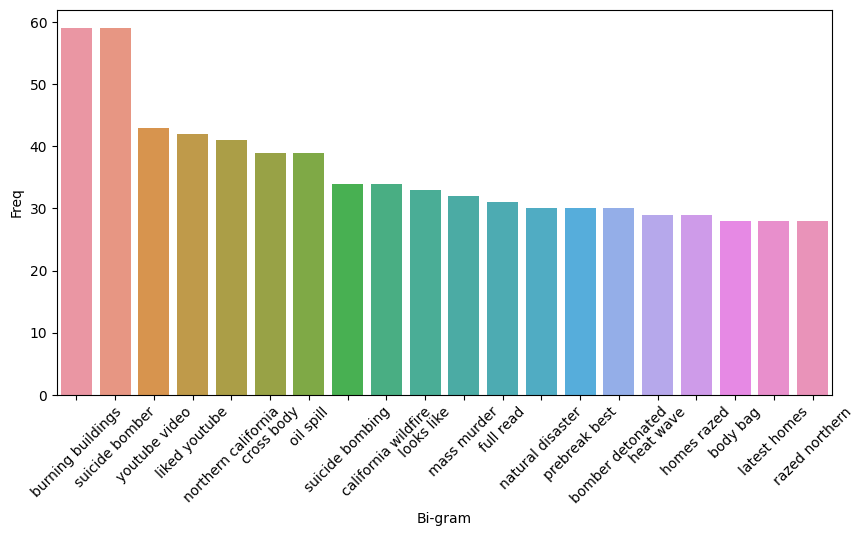

In [13]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])


In [14]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


In [15]:
top3_words = get_top_n3_words(data["text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

[Text(0, 0, 'liked youtube video'),
 Text(1, 0, 'suicide bomber detonated'),
 Text(2, 0, 'northern california wildfire'),
 Text(3, 0, 'latest homes razed'),
 Text(4, 0, 'homes razed northern'),
 Text(5, 0, 'pkk suicide bomber'),
 Text(6, 0, 'bomber detonated bomb'),
 Text(7, 0, 'razed northern california'),
 Text(8, 0, 'old pkk suicide'),
 Text(9, 0, 'families sue legionnaires'),
 Text(10, 0, 'families affected fatal'),
 Text(11, 0, 'affected fatal outbreak'),
 Text(12, 0, 'obama declares disaster'),
 Text(13, 0, 'declares disaster typhoondevastated'),
 Text(14, 0, 'disaster typhoondevastated saipan'),
 Text(15, 0, 'sue legionnaires families'),
 Text(16, 0, 'legionnaires families affected'),
 Text(17, 0, 'wreckage conclusively confirmed'),
 Text(18, 0, 'watch airport get'),
 Text(19, 0, 'airport get swallowed')]

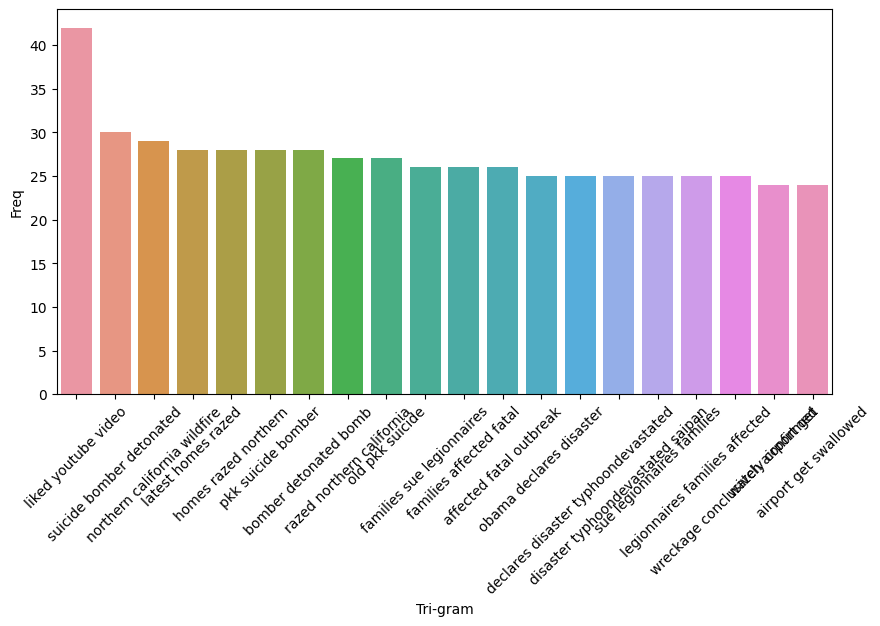

In [16]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

In [17]:
string_Total = " ".join(data["text"])

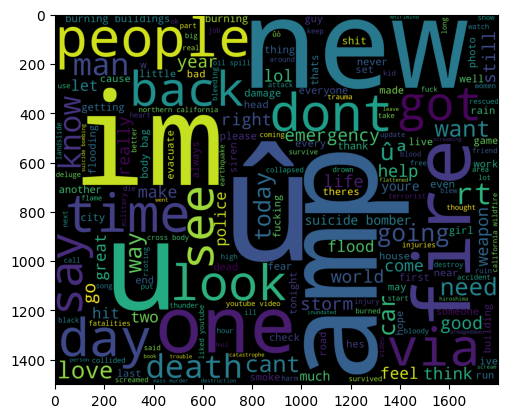

In [18]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw)

In [19]:
def split_into_words(i):
    return (i.split(" "))


In [20]:
from sklearn.model_selection import train_test_split

email_train,email_test = train_test_split(data,test_size=0.3)

In [21]:
email_test

,id,keyword,location,text,target
2184,3131,debris,NaN,aircraft debris found island malaysia confirms,1
929,1346,blown%20up,The Grey Area,thisdayinhistory confederate ship blown crew r...,1
2695,3866,detonation,NaN,ignition knock detonation sensorsenso beckarnl...,1
5308,7581,outbreak,"FCT, Abuja",person dies ny legionnaires disease outbreak s...,1
218,310,annihilated,Boston,cop pulls drunk driver safety seconds car hit ...,1
...,...,...,...,...,...
309,452,armageddon,"Alphen aan den Rijn, Holland",bed time dont wake unless revolution armageddo...,0
7235,10361,weapons,Multinational *****,jamesmelville old testimony weapons used promo...,0
3107,4458,electrocuted,HTX,fr cuz risk electrocuted every shower,0
6418,9177,suicide%20bomber,Moscow,suicide bomber kills saudiåêmosque,1


In [22]:
# Preparing email texts into word count matrix format 
emails_bow = CountVectorizer(analyzer=split_into_words).fit(data.text)

# ["mailing","body","texting"]
# ["mailing","awesome","good"]

# ["mailing","body","texting","good","awesome"]



#        "mailing" "body" "texting" "good" "awesome"
#  0          1        1       1        0       0
 
#  1          1        0        0       1       1    



In [23]:
# For all messages
all_emails_matrix = emails_bow.transform(data.text)
all_emails_matrix.shape 

(7613, 17293)

In [24]:
all_emails_matrix

<7613x17293 sparse matrix of type '<class 'numpy.int64'>'
	with 67341 stored elements in Compressed Sparse Row format>

In [25]:
# For training messages
train_emails_matrix = emails_bow.transform(email_train.text)
train_emails_matrix.shape # (3891,8175)

# For testing messages
test_emails_matrix = emails_bow.transform(email_test.text)
test_emails_matrix.shape # (1668,8175)

(2284, 17293)

In [26]:
####### Without TFIDF matrices ########################
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB


# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_emails_matrix,email_train.target)
train_pred_m = classifier_mb.predict(train_emails_matrix)
accuracy_train_m = np.mean(train_pred_m==email_train.target) # 98%

test_pred_m = classifier_mb.predict(test_emails_matrix)
accuracy_test_m = np.mean(test_pred_m==email_test.target) # 96%



In [27]:
accuracy_test_m

0.7964098073555166

In [28]:
from sklearn import metrics

# Computing Model Accuracy

print("Accuracy:",round(metrics.accuracy_score(email_test['target'], test_pred_m),2) * 100, "%")

print ("---------------")

# Printing confusion matrix

print ("Confusion matrix")

print ("---------------")

print(metrics.confusion_matrix(email_test['target'], test_pred_m))



Accuracy: 80.0 %
---------------
Confusion matrix
---------------
[[1110  199]
 [ 266  709]]


### Approach 2

In [29]:
# performing labelencoding for class frature
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['target'] = labelencoder.fit_transform(data['target'])

# creating document
My_document = list()
for i in data['text'][:]:
    My_document.append(i)
    
print(data)
print(My_document)

         id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0          deeds reason earthquake may allah forgive us       1  
1                 forest fire near la ronge sask canada       1  
2     residents asked shelter place notified officer...       1  
3     people receive wildfires evacuation orders cal...       1  
4     got sent photo ruby alaska smoke wildfires pou...       1  
...                                                 ...     ...  
7608  two giant cranes holding bridge collapse nearb...       1  
7609  ariaahrary thetawniest control wild fires cali...       1  
7610                 

In [30]:
#CountVectorizer will convert all the text into lowercase, will remove all the punctuations and all the stopwords.

from sklearn.feature_extraction.text import CountVectorizer
count_vector =CountVectorizer()

# CountVectorizer on the documents
count_vector.fit(My_document)
count_vector.get_feature_names()


document_freq = count_vector.transform(My_document).toarray()

print(count_vector.get_feature_names())

# creating frequency matrix

frequency_ofwords = pd.DataFrame(document_freq, columns= count_vector.get_feature_names() )



['aa', 'aaaa', 'aaaaaaallll', 'aaaaaand', 'aaarrrgghhh', 'aaceorg', 'aampb', 'aampw', 'aan', 'aannnnd', 'aar', 'aaronthefm', 'aashiqui', 'ab', 'aba', 'abandon', 'abandoned', 'abandonedpics', 'abandoning', 'abbandoned', 'abbott', 'abbruchsimulator', 'abbswinston', 'abbyairshow', 'abc', 'abcnews', 'abcnorio', 'abcs', 'abe', 'aberdeen', 'aberdeenfanpage', 'aberdeenfc', 'aberystwythshrewsbury', 'abes', 'abha', 'abia', 'ability', 'abject', 'ablaze', 'able', 'ableg', 'abninfvet', 'aboard', 'abomb', 'abombed', 'abomination', 'abortion', 'abortions', 'abouts', 'abrancaballero', 'abs', 'absence', 'absolute', 'absolutely', 'abstorm', 'abstract', 'absurd', 'absurdly', 'abuse', 'abused', 'abuseddesolateamplost', 'abuses', 'abusing', 'abysmaljoiner', 'ac', 'acaciapenn', 'academia', 'acarewornheart', 'acc', 'accept', 'accepte', 'accepts', 'access', 'accident', 'accidentally', 'accidentalprophecy', 'accidently', 'accidents', 'accidentwho', 'accionempresa', 'accompanying', 'according', 'accordingly', 

C:\Users\Slmss\.conda\envs\NLP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
from sklearn.naive_bayes import MultinomialNB   # imports Naive Bayes classifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

data_train, data_test, datatarget_train, datatarget_test = train_test_split(frequency_ofwords, data['target'], test_size=0.3)

In [32]:
naive_bayes = MultinomialNB()
naive_bayes.fit(data_train, datatarget_train)

MultinomialNB()

In [33]:
predictions = naive_bayes.predict(data_test)

In [34]:

# Computing Model Accuracy

print("Accuracy:",round(metrics.accuracy_score(datatarget_test, predictions),2) * 100, "%")

print ("---------------")

# Printing confusion matrix

print ("Confusion matrix")

print ("---------------")

print(metrics.confusion_matrix(datatarget_test, predictions))



Accuracy: 79.0 %
---------------
Confusion matrix
---------------
[[1076  219]
 [ 260  729]]
